# Epsilon stats calculation

With this notebook one can reproduce the plots and statistics reported in our paper based on the loaded
precomputed values. If you wish to reproduce epsilon metric evaluation from scratch, please use `Epsilon reproduce.ipynb` notebook.

For each type of training and dataset we reproduce the following values:

- global Spearman rank correlation
- epsilon top-10% Spearman rank correlation
- global Kendall rank correlation
- epsilon top-10% Kendall rank correlation
- number of top-64 scored architectures within top-5% lowest perplexity architectures
- fraction of top-10% scored architectures belonging to top-10% lowest perplexity models

We also build plots for correlations visualisation.

In [1]:
import os
import json
import numpy as np
import pickle as pkl
from prettytable import PrettyTable

from epsilon_utils import compute_stats, plot_results

### Single run

14322 randomly created architectures are evaluated with a single seed.

In [2]:
# Load precomputed results
save_dir_single = './release_results/NLP/PTB/SINGLE/WEIGHT_1e-05_0.001/BS256/'
data_file = open('{}Data'.format(save_dir_single),'rb')

data = pkl.load(data_file)

score = data["score"]
accs = data["accs"]
nparams = data["nparams"]

data_file.close()

In [3]:
# Make the table
headers = ["Spearman (global)", "Spearman (top-10%)", "Kendall (global)", "Kendall (top-10%)", "Top-10%/top-10%", "Top-64/top-5%"]
t = PrettyTable(headers)
stats, _ = compute_stats(score, accs)
t.add_row(stats)
print(t)

+-------------------+--------------------+------------------+-------------------+-----------------+---------------+
| Spearman (global) | Spearman (top-10%) | Kendall (global) | Kendall (top-10%) | Top-10%/top-10% | Top-64/top-5% |
+-------------------+--------------------+------------------+-------------------+-----------------+---------------+
|       -0.34       |        0.16        |      -0.23       |        0.14       |       3.57      |      3.00     |
+-------------------+--------------------+------------------+-------------------+-----------------+---------------+


/home/gracheva/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/gracheva/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/home/gracheva/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/home/gracheva/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/home/gracheva/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/gracheva/miniconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


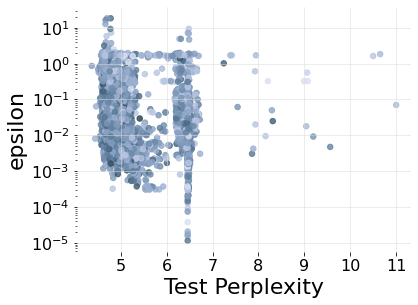

In [8]:
# There is one outlier in accuracies
# score_plot = np.array(score)[accs<np.nanmax(accs)]
# accs_plot = np.array(accs)[accs<np.nanmax(accs)]
# nparams_plot = np.array(nparams)[accs<np.nanmax(accs)]

score_plot = np.array(score)[(np.array(score)>0.00001) & (np.array(accs)<np.nanmax(accs))]
accs_plot = np.array(accs)[(np.array(score)>0.00001) & (np.array(accs)<np.nanmax(accs))]
nparams_plot = np.array(nparams)[(np.array(score)>0.00001) & (np.array(accs)<np.nanmax(accs))]
# Overall
plot_results(score=score_plot,
             accs=accs_plot,
             nparams=nparams_plot,
             top10=False,
             log_scale=True,
             save_dir=save_dir_single,
             save_name="Epsilon")

/home/gracheva/Work/NAS/NAS-Bench-NLP/epsilon_utils.py:70: RuntimeWarning: invalid value encountered in greater
  keep = accs<np.nanpercentile(accs, 10)


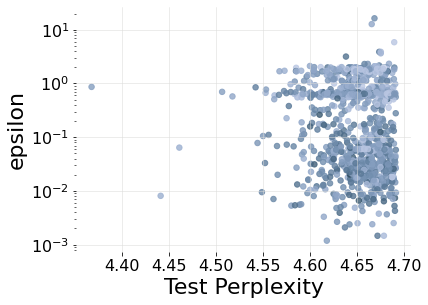

In [9]:
# Top-10% perplexity networks
plot_results(score=score,
             accs=accs,
             nparams=nparams,
             top10=True,
             log_scale=True,
             save_dir=save_dir_single,
             save_name='Epsilon')

### Multiple runs

4114 architectures are trained with 3 different seeds. For each of them we 
evaluate epsilon once and collect the test error information to report the
mean and min-max range.

In [9]:
# Load precomputed results
save_dir_multi = './release_results/NLP/PTB/MULTI/WEIGHT_1e-05_0.001/BS256/'
data_file = open('{}Data'.format(save_dir_multi),'rb')

data = pkl.load(data_file)

score = data["score"]
accs_mean = data["accs_mean"]
accs_min = data["accs_min"]
accs_max = data["accs_max"]
nparams = data["nparams"]
    
data_file.close()

In [10]:
# Make the table
headers = ["Spearman (global)", "Spearman (top-10%)", "Kendall (global)", "Kendall (top-10%)", "Top-10%/top-10%", "Top-64/top-5%"]
t = PrettyTable(headers)
stats, _ = compute_stats(score, accs_mean)
t.add_row(stats)
print(t)

+-------------------+--------------------+------------------+-------------------+-----------------+---------------+
| Spearman (global) | Spearman (top-10%) | Kendall (global) | Kendall (top-10%) | Top-10%/top-10% | Top-64/top-5% |
+-------------------+--------------------+------------------+-------------------+-----------------+---------------+
|       -0.36       |       -0.03        |      -0.25       |        0.00       |       2.44      |      0.00     |
+-------------------+--------------------+------------------+-------------------+-----------------+---------------+


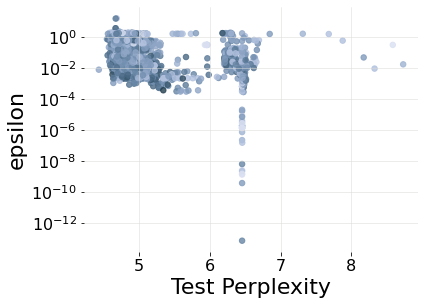

In [11]:
# Overall
plot_results(score=score,
             accs=accs_mean,
             accs_min=accs_min,
             accs_max=accs_max,
             nparams=nparams,
             log_scale=True,
             top10=False,
             save_dir=save_dir_multi,
             save_name='Epsilon')

/home/gracheva/Work/NAS/NAS-Bench-NLP/epsilon_utils.py:70: RuntimeWarning: invalid value encountered in greater
  keep = accs<np.nanpercentile(accs, 10)


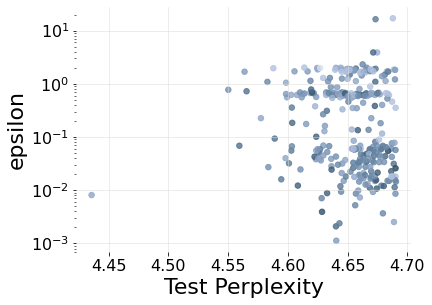

In [12]:
# Top-10% perplexity networks
plot_results(score=score,
             accs=accs_mean,
             accs_min=accs_min,
             accs_max=accs_max,
             nparams=nparams,
             log_scale=True,
             top10=True,
             save_dir=save_dir_multi,
             save_name='Epsilon')